# Taxi Trip Pricing - Exploratory Data Analysis
This notebook focuses on cleaning and exploring the taxi trip dataset to prepare it for machine learning.

##  Data Loading 
We load the taxi data into the notebook to see what information we have.

In [19]:
import pandas as pd

df = pd.read_csv("../data/taxi_trip_pricing.csv")

df.head()


,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [21]:
df.describe().T.drop(["count"],axis=1)

,mean,std,min,25%,50%,75%,max
Trip_Distance_km,27.070547,19.905300,1.2300,12.63250,25.8300,38.40500,146.067047
Passenger_Count,2.476842,1.102249,1.0000,1.25000,2.0000,3.00000,4.000000
Base_Fare,3.502989,0.870162,2.0100,2.73000,3.5200,4.26000,5.000000
Per_Km_Rate,1.233316,0.429816,0.5000,0.86000,1.2200,1.61000,2.000000
Per_Minute_Rate,0.292916,0.115592,0.1000,0.19000,0.2900,0.39000,0.500000
Trip_Duration_Minutes,62.118116,32.154406,5.0100,35.88250,61.8600,89.05500,119.840000
Trip_Price,56.874773,40.469791,6.1269,33.74265,50.0745,69.09935,332.043689


## Cleaning the Data
We remove all rows that have empty cells (NaN). This is important because the model cannot learn from missing information.

In [22]:
df = df.dropna()
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
5,8.64,Afternoon,Weekend,2.0,Medium,Clear,2.55,1.71,0.48,89.33,60.2028
12,41.79,Night,Weekend,3.0,High,Clear,4.60,1.77,0.11,86.95,88.1328
14,9.91,Evening,Weekday,2.0,High,Clear,2.32,1.26,0.34,41.72,28.9914


In [23]:
columns_to_drop = [
    'Base_Fare', 
    'Per_Km_Rate', 
    'Per_Minute_Rate', 
    'Trip_Duration_Minutes'
]

df = df.drop(columns=columns_to_drop)

In [24]:
df.isnull().sum()

Trip_Distance_km      0
Time_of_Day           0
Day_of_Week           0
Passenger_Count       0
Traffic_Conditions    0
Weather               0
Trip_Price            0
dtype: int64

## Counting Categories
We count how many trips we have for different times, days, and weather. 

In [25]:
print(df['Time_of_Day'].value_counts())
print(df['Day_of_Week'].value_counts())
print(df['Traffic_Conditions'].value_counts())
print(df['Weather'].value_counts())

Time_of_Day
Afternoon    220
Morning      157
Evening      124
Night         61
Name: count, dtype: int64
Day_of_Week
Weekday    381
Weekend    181
Name: count, dtype: int64
Traffic_Conditions
Medium    236
Low       218
High      108
Name: count, dtype: int64
Weather
Clear    386
Rain     134
Snow      42
Name: count, dtype: int64


##  Finding Connections (Correlation)
We check which factors have the strongest connection to the price. This tells us what makes a taxi trip expensive or cheap.

In [26]:
df.groupby("Weather")["Trip_Price"].mean().sort_values(ascending=False)

Weather
Rain     58.844480
Clear    57.342003
Snow     56.850657
Name: Trip_Price, dtype: float64

In [27]:
df.groupby("Traffic_Conditions")["Trip_Price"].mean()

Traffic_Conditions
High      69.169797
Low       55.542874
Medium    54.356849
Name: Trip_Price, dtype: float64

## Price Analysis: Time and Day
We use a heatmap to see when taxi trips are most expensive. The darker colors show the highest average prices.

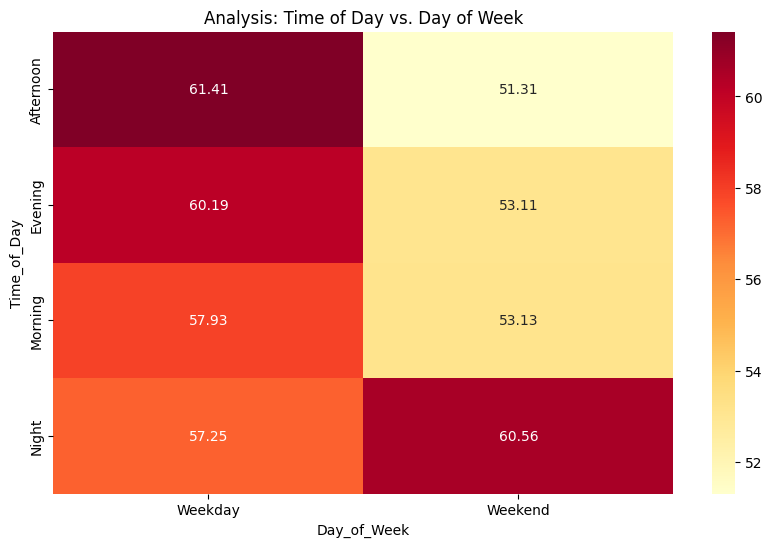

In [28]:
price_analysis = df.pivot_table(
    values='Trip_Price', 
    index='Time_of_Day', 
    columns='Day_of_Week', 
    aggfunc='mean'
)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(price_analysis, annot=True, fmt=".2f", cmap="YlOrRd")
plt.title("Analysis: Time of Day vs. Day of Week")
plt.show()

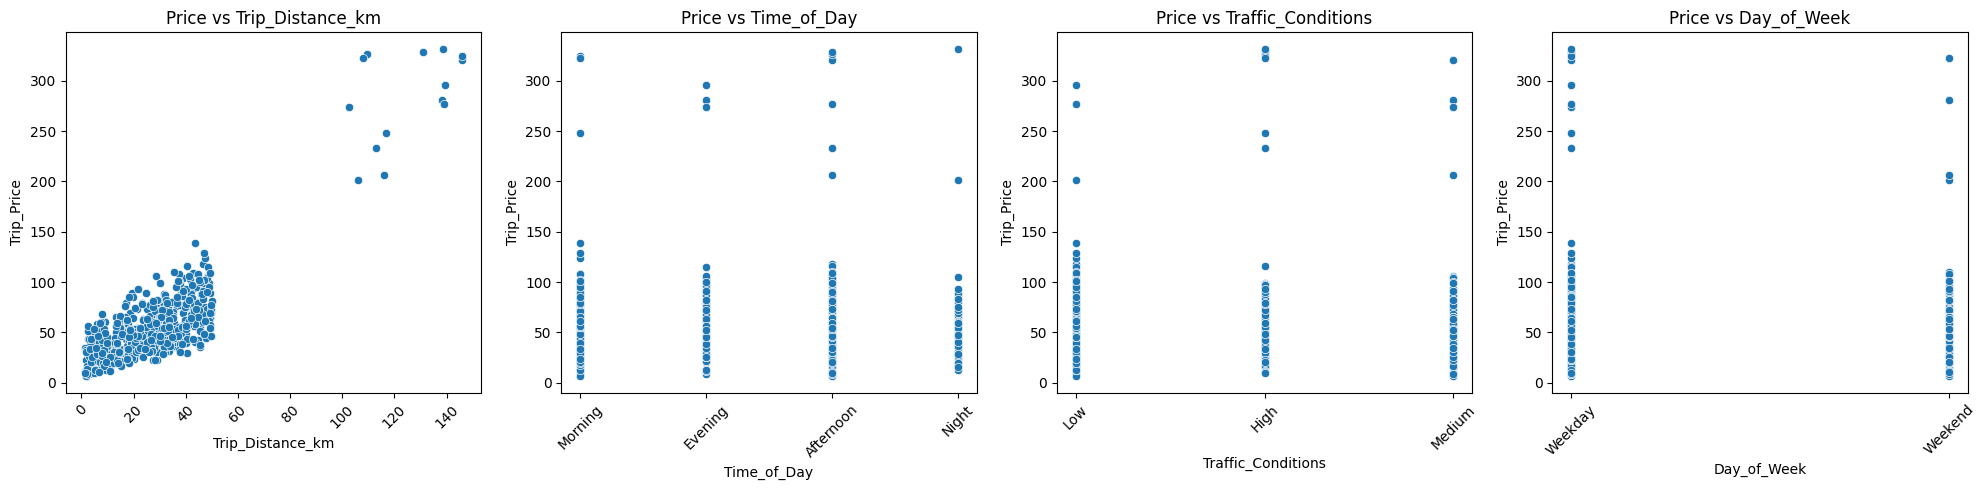

In [29]:
cols = ["Trip_Distance_km", "Time_of_Day", "Traffic_Conditions", "Day_of_Week"] 
fig, axes = plt.subplots(1, 4, figsize=(20, 5)) 

for i, col in enumerate(cols):
    sns.scatterplot(data=df, x=col, y="Trip_Price", ax=axes[i])
    axes[i].set_title(f"Price vs {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## Saving our cleaned data
Now we save all our work into a new CSV file. This file is clean and ready to be used to train our AI model in the next step.

In [31]:
import pandas as pd
import sys
import os

sys.path.append(os.path.abspath("../../"))
from taxipred.utils.constants import DATA_PATH

df.to_csv(DATA_PATH / "cleaned_taxi_trip_pricing.csv", index=False)